<a href="https://colab.research.google.com/github/jmlucasusc4/CNN_Project/blob/main/CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the libraries

In [73]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import zipfile 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [74]:
local_zip= '/training_set-20220106T011830Z-001.zip'
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content")
zip_ref.close()

In [75]:
local_zip= '/test_set-20220106T011827Z-001.zip'
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content")
zip_ref.close()

In [76]:
### DEFINE DIRECTORY

# Directory with training cat images
train_cat_dir = os.path.join("/content/training_set/cats")

# Directory with training dog images.
train_dog_dir = os.path.join("/content/training_set/dogs")

# Directory with validation cat images
test_cat_dir = os.path.join("/content/test_set/cats")

# Directory with validation dog images
test_dog_dir = os.path.join("/content/test_set/dogs")

In [77]:
# Training cat directory
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

# Training dog directory
train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

# Validation cat directory
test_cat_names = os.listdir(test_cat_dir)
print(test_cat_names[:10])

# Validation dog  directory
test_dog_names = os.listdir(test_dog_dir)
print(test_dog_names[:10])

['cat.1760.jpg', 'cat.13.jpg', 'cat.1423.jpg', 'cat.241.jpg', 'cat.1260.jpg', 'cat.339.jpg', 'cat.1604.jpg', 'cat.1635.jpg', 'cat.612.jpg', 'cat.484.jpg']
['dog.1478.jpg', 'dog.798.jpg', 'dog.1236.jpg', 'dog.1147.jpg', 'dog.242.jpg', 'dog.49.jpg', 'dog.287.jpg', 'dog.552.jpg', 'dog.1373.jpg', 'dog.872.jpg']
['cat.4435.jpg', 'cat.4020.jpg', 'cat.4280.jpg', 'cat.4383.jpg', 'cat.4253.jpg', 'cat.4387.jpg', 'cat.4138.jpg', 'cat.4200.jpg', 'cat.4008.jpg', 'cat.4363.jpg']
['dog.4138.jpg', 'dog.4411.jpg', 'dog.4108.jpg', 'dog.4255.jpg', 'dog.4076.jpg', 'dog.4430.jpg', 'dog.4448.jpg', 'dog.4340.jpg', 'dog.4165.jpg', 'dog.4279.jpg']


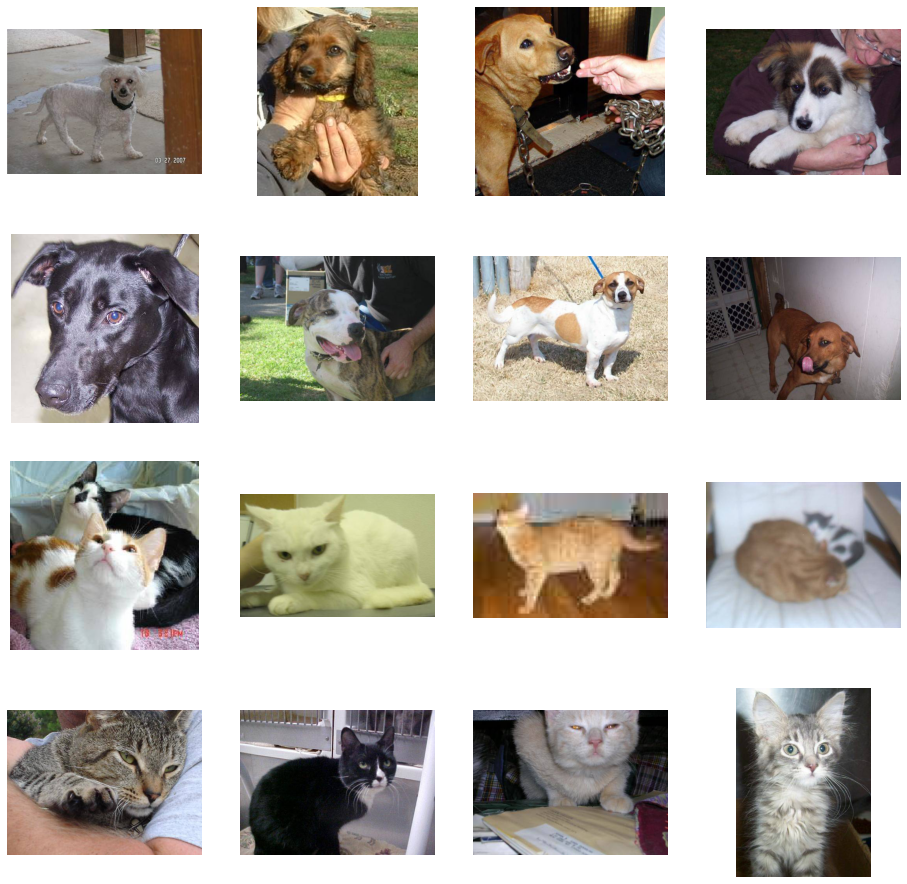

In [78]:
# Parameters for our graph 
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Setup matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_dog_px = [os.path.join(train_dog_dir, fname) for fname in train_dog_names[pic_index-8:pic_index]]
next_cat_px = [os.path.join(train_cat_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dog_px + next_cat_px):
  # Set subplots
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

###Specifying the TensorFlow version

In [62]:
tf.__version__

'2.7.0'

###Testing for GPU

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

###Preprocessing the Test set

In [87]:
model = tf.keras.models.Sequential([
                                    # The first convolution
                                    # Input image has 3 bytes color
                                    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The sixth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results to feed in Deep Neural Network
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)      

###Training the CNN

In [89]:
# Compile the Model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [92]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/content/training_set",
    target_size=(300, 300),
    batch_size=64,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/content/test_set",
    target_size=(300, 300),
    batch_size=32, 
    class_mode="binary"
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [93]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8, 
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/50
8/8 [==============================] - 60s 7s/step - loss: 0.6960 - accuracy: 0.5059 - val_loss: 0.6831 - val_accuracy: 0.5156
Epoch 2/50
8/8 [==============================] - 58s 7s/step - loss: 0.6970 - accuracy: 0.4941 - val_loss: 0.6914 - val_accuracy: 0.6094
Epoch 3/50
8/8 [==============================] - 55s 7s/step - loss: 0.9415 - accuracy: 0.5604 - val_loss: 0.6981 - val_accuracy: 0.4922
Epoch 4/50
8/8 [==============================] - 58s 7s/step - loss: 0.6946 - accuracy: 0.5137 - val_loss: 0.6875 - val_accuracy: 0.5312
Epoch 5/50
8/8 [==============================] - 58s 7s/step - loss: 0.6906 - accuracy: 0.5195 - val_loss: 0.6794 - val_accuracy: 0.5977
Epoch 6/50
8/8 [==============================] - 58s 7s/step - loss: 0.7014 - accuracy: 0.5547 - val_loss: 0.6933 - val_accuracy: 0.4883
Epoch 7/50
8/8 [==============================] - 58s 7s/step - loss: 0.6893 - accuracy: 0.5430 - val_loss: 0.6806 - val_accuracy: 0.6172
Epoch 8/50
8/8 [==================

###Accuracy

In [96]:
x2= model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [97]:
x1= model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


###Making a single prediction

In [101]:
from keras.preprocessing import image
from google.colab import files
# Model in production
# Using google colab file system
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = "/content/" + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0]) 
  if classes[0] > 0.5:
    print(fn, "is a cat")
  else:
    print(fn, "is a dog")

Saving dog.1.jpg to dog.1.jpg
[1.]
dog.1.jpg is a cat
